In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.python.keras.callbacks import TensorBoard
import time


Get Data fro classification problem

Binary Classification

In [2]:
from sklearn.datasets import make_circles

n_samples = 3000
X,y = make_circles(n_samples,noise=0.03,random_state = 42)

In [3]:
circles = pd.DataFrame({
    'X0':X[:,0],
    'X1':X[:,1],
    'Lables': y
})

In [4]:
circles

,X0,X1,Lables
0,0.204614,0.744496,1
1,0.240364,-0.972271,0
2,0.231681,0.765188,1
3,0.485038,0.867620,0
4,-0.397572,-0.703067,1
...,...,...,...
2995,0.691894,0.483294,1
2996,-0.112814,-1.007035,0
2997,-0.004573,-1.009240,0
2998,0.686653,-0.770001,0


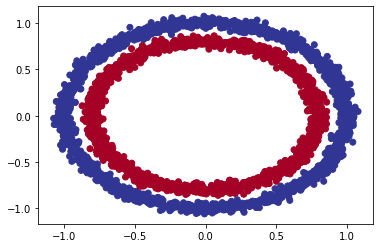

In [5]:
plt.scatter(X[:,0],X[:,1], c = y, cmap=plt.cm.RdYlBu_r)

In [6]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

model1.fit(X,y,epochs = 10)


Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 5.2028 - accuracy: 0.5363
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 5.0407 - accuracy: 0.5377
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 5.5130 - accuracy: 0.5317
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 6.0332 - accuracy: 0.5163
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 6.8934 - accuracy: 0.4953
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 6.8466 - accuracy: 0.4973
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 6.6477 - accuracy: 0.5060
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 6.5777 - accuracy: 0.5070
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 6.6020 - accuracy: 0.5047
Epoch 10/10
94/94 [==============================] - 0s 1ms/step - loss: 6.4671 - accuracy: 0.5077


Adding an extra layer to the model

In [7]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model2.fit(X, y, epochs=200, verbose = 0)

model2.evaluate(X,y)


94/94 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.7124738693237305, 0.5]

Adding more hidden neurons and an extra layer

In [8]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(), # Changing the optimizer
               metrics=['accuracy'])

model3.fit(X, y, epochs=100, verbose=0)

model3.evaluate(X, y)


94/94 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5000


[0.6947673559188843, 0.5]

Doing multicalss classification


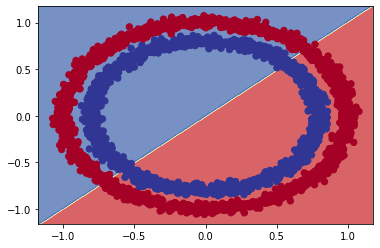

In [9]:
from helper import plot_decision_boundary

plot_decision_boundary(model3,X = X,y = y)

Use the model for a regression problem

In [10]:
# Build a dataset for regression
# tf.random.set_seed(42)

X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5) # y = X +100

#Split data to train test split
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:] 

model3.fit(tf.expand_dims(X_reg_train, axis = -1),y_reg_train, epochs = 100, verbose =0)


Replicate the model for regression problem

In [32]:

from gc import callbacks


NAME = f'Non-Linaerity-Model {int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs/{NAME}')

tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.mae, # Altering the loss function
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=['mae'])

hist = model4.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs=100,callbacks = [tensorboard], verbose=0)
y_reg_pred = model4.predict(tf.expand_dims(X_reg_test,axis = -1))


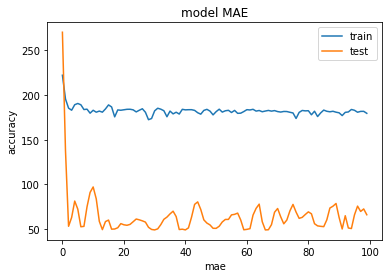

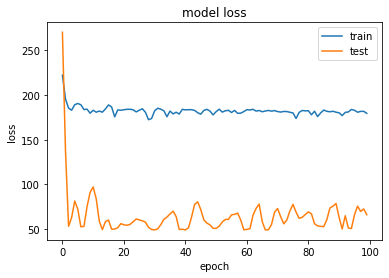

In [12]:
from helper import plot_model_training
plot_model_training(hist)


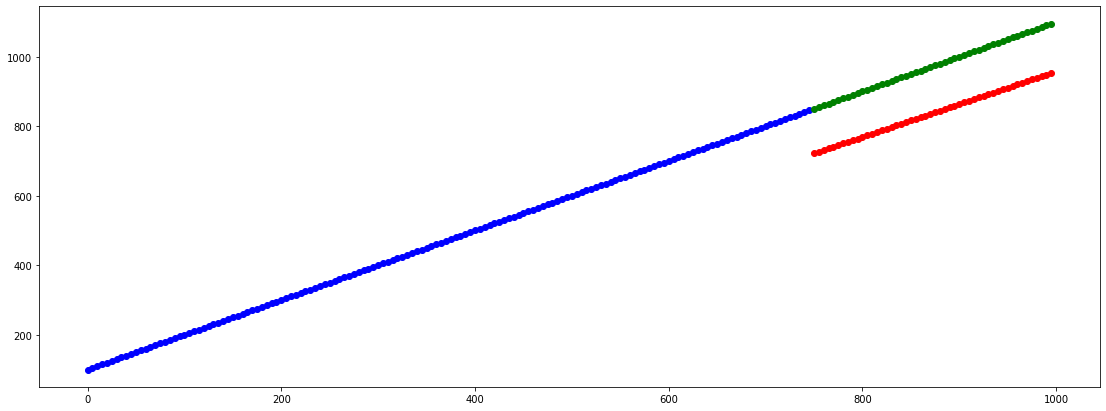

In [17]:

plt.figure(figsize=(19,7))
plt.scatter(X_reg_train,y_reg_train,c = 'b', label = 'Training Data')
plt.scatter(X_reg_test,y_reg_test,c = 'g', label = 'Testing Data')
plt.scatter(X_reg_test,y_reg_pred,c = 'r', label = 'Predictions')


Introducing Non Linearity In Our Model

In [30]:

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(
#     log_dir=log_dir, histogram_freq=1)

NAME = f'Non-Linaerity-Model {int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs/{NAME}')
# Use tensorboard --logdir=./ in terminal to run ternsorboard
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ['accuracy']
            )

history = model5.fit(X,y,epochs =100,validation_split=0.33,callbacks = [tensorboard], verbose = 0)

Binary Classification


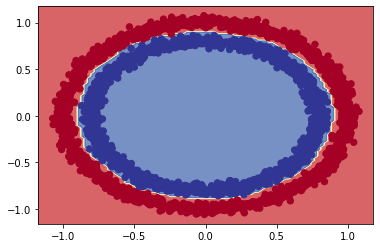

In [31]:
plot_decision_boundary(model5,X,y)

In [29]:
plot_model_training(history)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\avirupsaha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\avirupsaha\AppData\Local\Temp\ipykernel_19664\1487625001.py", line 1, in <cell line: 1>
    plot_model_training(history)
  File "c:\Users\avirupsaha\Notebooks\Tensorflow\helper.py", line 42, in plot_model_training
KeyError: 'mae'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\avirupsaha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\avirupsaha\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\avirupsaha\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceb